# Sales Prediction Using Python

* Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.
* In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let' s embark on the journey of sales prediction using machine learning in Python.


---


Dataset: [dataset.csv](https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input)


---


Submitted By: Nishchal Kansara<br>
Data Science (Intern)<br>
Batch: December A91<br>
Submitted To: CodSoft


---




# Loading and Exploring the Dataset

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Data Science/CodSoft (Internship)/sales_prediction_using_python/dataset.csv'

df = pd.read_csv(path)

Mounted at /content/drive


In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
df.duplicated().sum()

0

# Data Visualization

## Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Heatmap for Correlation

In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


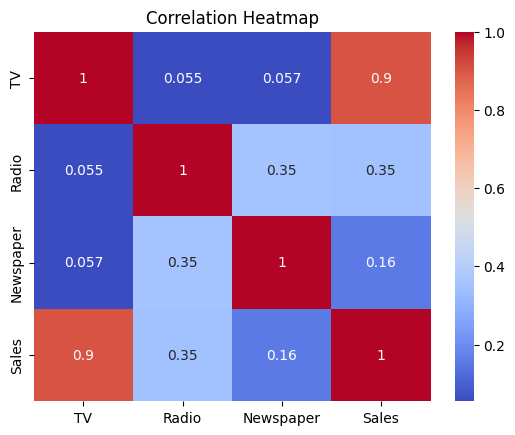

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Pairplot

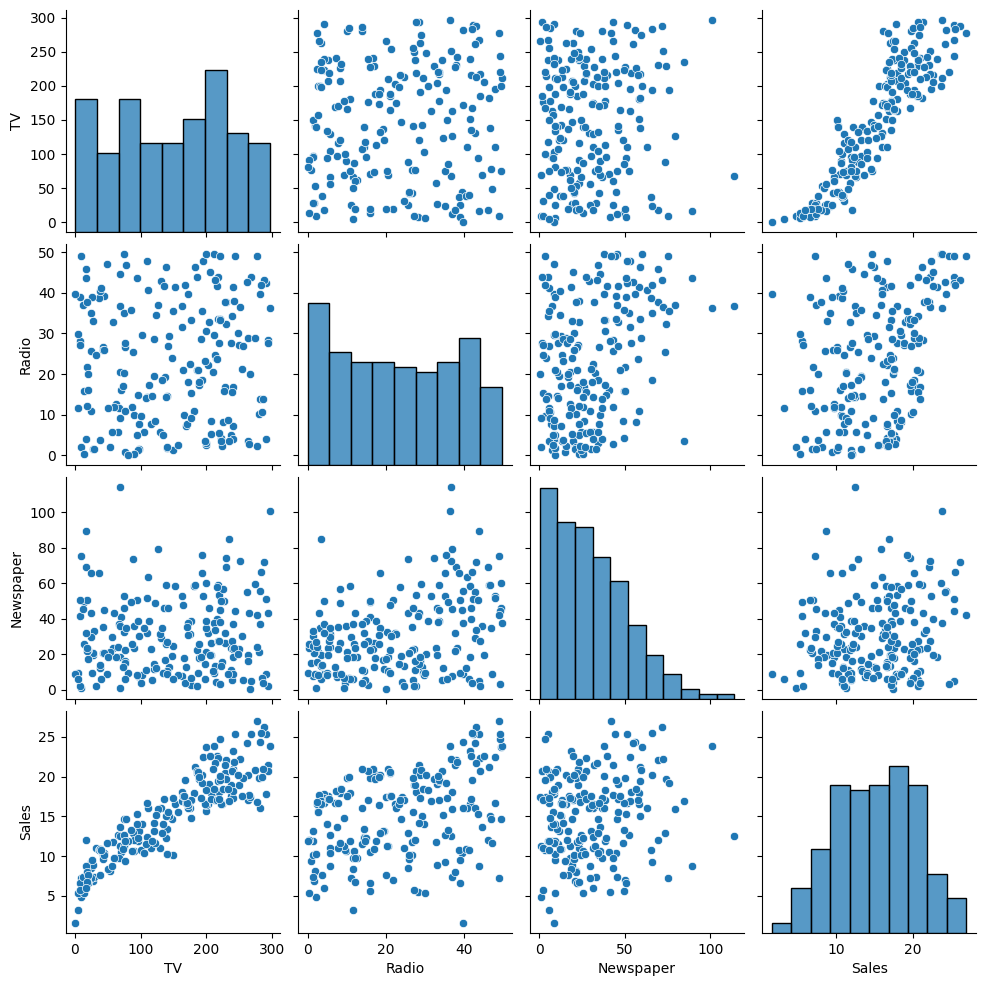

In [ ]:
sns.pairplot(df)
plt.show()

## Histogram

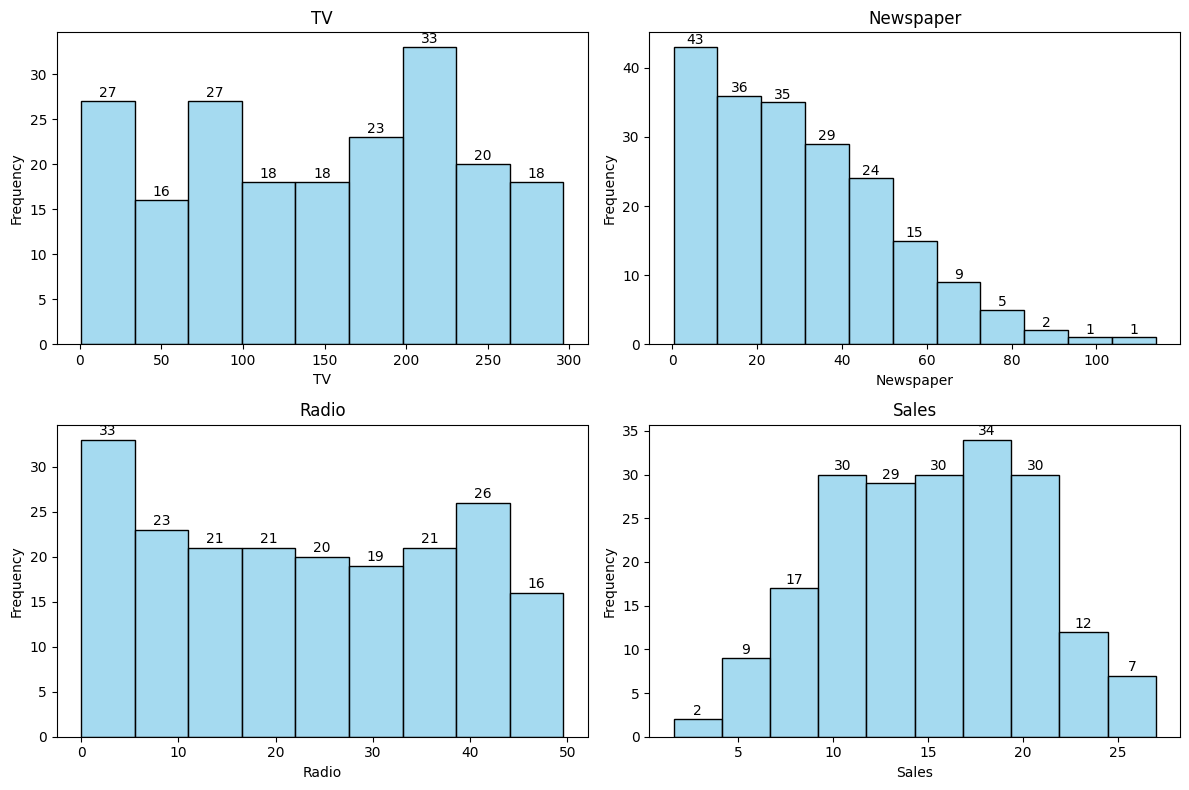

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.histplot(df['TV'], ax=ax[0][0], color='skyblue')
ax[0][0].set_xlabel('TV')
ax[0][0].set_ylabel('Frequency')
ax[0][0].set_title('TV')

for p in ax[0][0].patches:
    height = p.get_height()
    ax[0][0].text(p.get_x() + p.get_width() / 2., height + 0.5,
                  f'{height:.0f}', ha='center', color='black')

sns.histplot(df['Newspaper'], ax=ax[0][1], color='skyblue')
ax[0][1].set_xlabel('Newspaper')
ax[0][1].set_ylabel('Frequency')
ax[0][1].set_title('Newspaper')

for p in ax[0][1].patches:
    height = p.get_height()
    ax[0][1].text(p.get_x() + p.get_width() / 2., height + 0.5,
                  f'{height:.0f}', ha='center', color='black')

sns.histplot(df['Radio'], ax=ax[1][0], color='skyblue')
ax[1][0].set_xlabel('Radio')
ax[1][0].set_ylabel('Frequency')
ax[1][0].set_title('Radio')

for p in ax[1][0].patches:
    height = p.get_height()
    ax[1][0].text(p.get_x() + p.get_width() / 2., height + 0.5,
                  f'{height:.0f}', ha='center', color='black')

sns.histplot(df['Sales'], ax=ax[1][1], color='skyblue')
ax[1][1].set_xlabel('Sales')
ax[1][1].set_ylabel('Frequency')
ax[1][1].set_title('Sales')

for p in ax[1][1].patches:
    height = p.get_height()
    ax[1][1].text(p.get_x() + p.get_width() / 2., height + 0.5,
                  f'{height:.0f}', ha='center', color='black')

plt.tight_layout()
plt.show()

## Sales Distribution

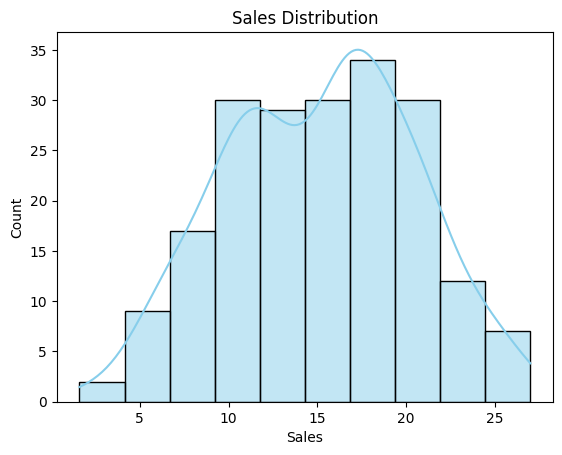

In [ ]:
sns.histplot(df['Sales'], kde=True, color='skyblue')
plt.title("Sales Distribution")
plt.show()

In [ ]:
fig = px.histogram(
    df,
    x='Sales',
    nbins=20,
    title='Sales Distribution',
    color_discrete_sequence=['skyblue'],
    text_auto='.2f'
)

fig.update_traces(
    textfont_size=12,
    textposition='outside'
)

fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center'},
    xaxis_title='Sales',
    yaxis_title='Count',
    plot_bgcolor='white',
    bargap=0.05
)

fig.show()

## Impact of Advertising Channels

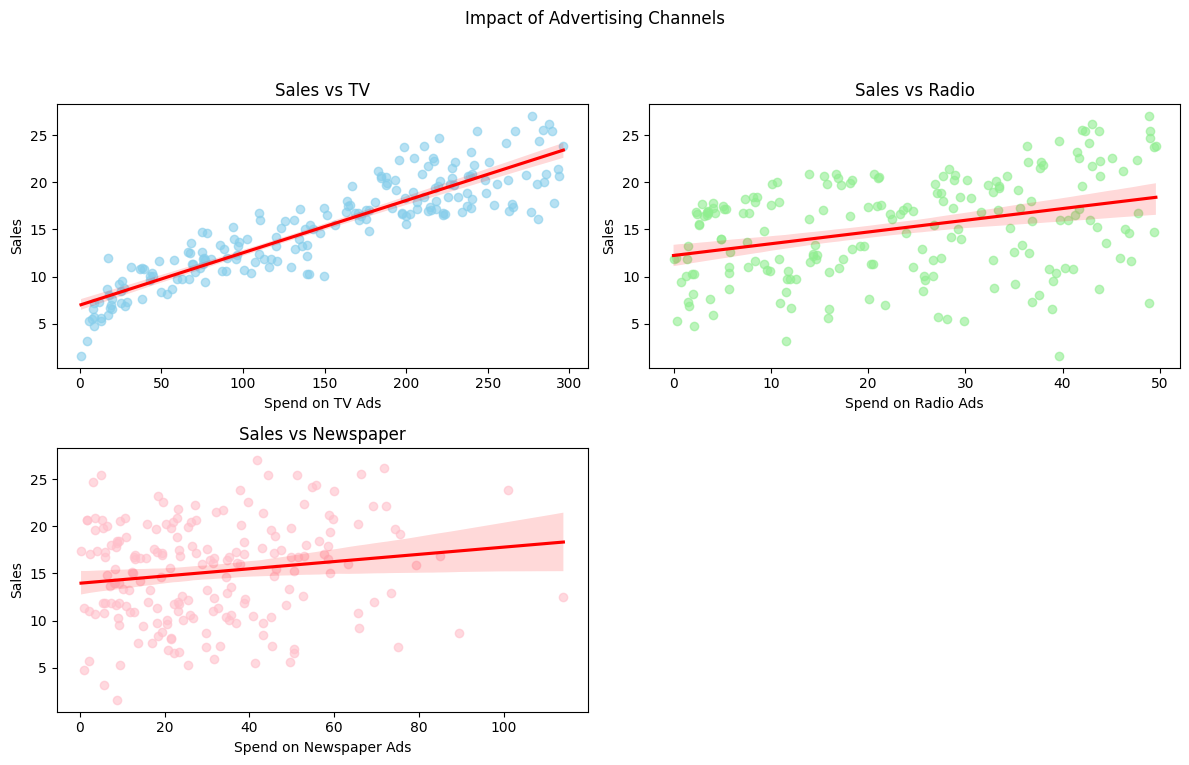

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Impact of Advertising Channels')

sns.regplot(
    x='TV', y='Sales', data=df, ax=ax[0][0],
    line_kws={'color': 'red'}, scatter_kws={'color': 'skyblue', 'alpha': 0.6}
)
ax[0][0].set_title('Sales vs TV', fontsize=12)
ax[0][0].set_xlabel('Spend on TV Ads')
ax[0][0].set_ylabel('Sales')

sns.regplot(
    x='Radio', y='Sales', data=df, ax=ax[0][1],
    line_kws={'color': 'red'}, scatter_kws={'color': 'lightgreen', 'alpha': 0.6}
)
ax[0][1].set_title('Sales vs Radio', fontsize=12)
ax[0][1].set_xlabel('Spend on Radio Ads')
ax[0][1].set_ylabel('Sales')

sns.regplot(
    x='Newspaper', y='Sales', data=df, ax=ax[1][0],
    line_kws={'color': 'red'}, scatter_kws={'color': 'pink', 'alpha': 0.6}
)
ax[1][0].set_title('Sales vs Newspaper', fontsize=12)
ax[1][0].set_xlabel('Spend on Newspaper Ads')
ax[1][0].set_ylabel('Sales')

ax[1][1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Advertising Spend vs Sales

In [ ]:
import plotly.express as px

df_area = df[['Sales', 'TV', 'Radio', 'Newspaper']]

df_area_melted = df_area.melt(id_vars=['Sales'], var_name='Platform', value_name='Spend')

custom_palette = {
    'TV': 'lightblue',
    'Radio': 'lightgreen',
    'Newspaper': 'pink'
}

fig = px.area(df_area_melted, x='Sales', y='Spend', color='Platform',
              line_group='Platform', title='Advertising Spend vs Sales',
              labels={'Sales': 'Sales', 'Spend': 'Advertising Spend'},
              markers=True, color_discrete_map=custom_palette)

fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=list(range(0, 33, 3))),
    yaxis_title='Platform Spend',
    xaxis_title='Sales',
    template='plotly_white',
    showlegend=True
)

fig.show()

# Model Building

## Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Statistical Analysis and Modeling

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           8.13e-99
Time:                        13:34:45   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

## Linear Regression (Model)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_lr_pred = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_lr_pred)
mse_lr = mean_squared_error(y_test, y_lr_pred)
r2_lr = r2_score(y_test, y_lr_pred)

print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"R-squared: {r2_lr:.2f}")

Mean Absolute Error (MAE): 1.27
Mean Squared Error (MSE): 2.91
R-squared: 0.91


## Support Vector Regressor (Model)

In [ ]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

y_svr_pred = svr_model.predict(X_test)

mae_svr = mean_absolute_error(y_test, y_svr_pred)
mse_svr = mean_squared_error(y_test, y_svr_pred)
r2_svr = r2_score(y_test, y_svr_pred)

print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"R-squared: {r2_svr:.2f}")

Mean Absolute Error (MAE): 1.48
Mean Squared Error (MSE): 3.50
R-squared: 0.89


# Model Performance

## Model Performance Comparison

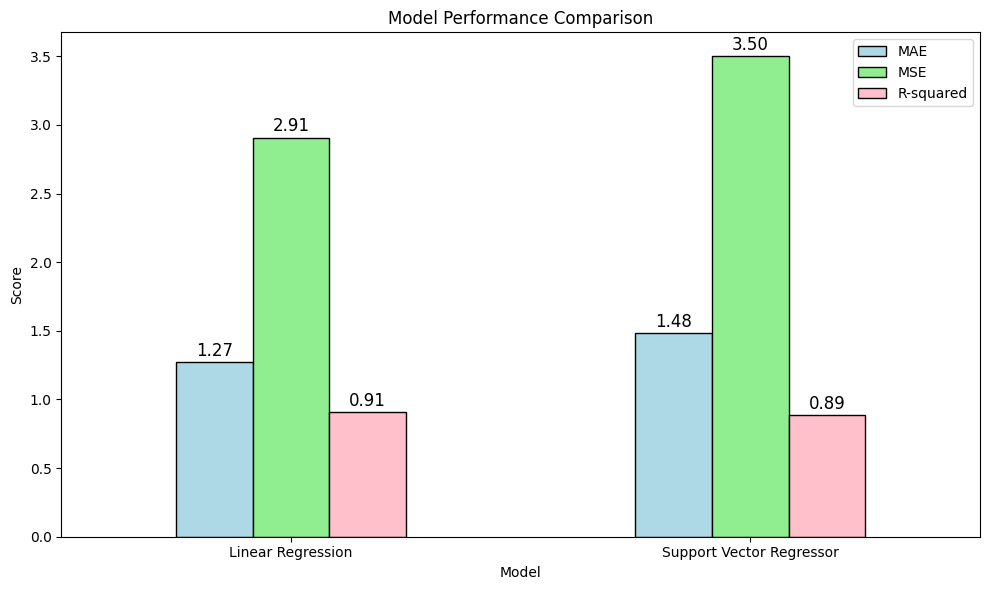

In [ ]:
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Support Vector Regressor'],
    'MAE': [mae_lr, mae_svr],
    'MSE': [mse_lr, mse_svr],
    'R-squared': [r2_lr, r2_svr]
})

ax = metrics_df.plot(x='Model', kind='bar', figsize=(10, 6),
                     color=['lightblue', 'lightgreen', 'pink'], edgecolor='black')

plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')

plt.xticks(rotation=360)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black',
                xytext=(0, 8), textcoords='offset points')

plt.tight_layout()
plt.show()

## Summary with Conclusion

In [ ]:
model_comparison = {
    'Model': ['Linear Regression', 'Support Vector Regressor'],
    'MAE': [mae_lr, mae_svr],
    'MSE': [mse_lr, mse_svr],
    'R-squared': [r2_lr, r2_svr]
}

comparison_df = pd.DataFrame(model_comparison)

print(comparison_df)

if r2_svr > r2_lr and mae_svr < mae_lr and mse_svr < mse_lr:
    conclusion = "Support Vector Regressor (SVR) is the better model based on all metrics."
elif r2_lr > r2_svr and mae_lr < mae_svr and mse_lr < mse_svr:
    conclusion = "Linear Regression is the better model based on all metrics."
else:
    conclusion = "Both models have comparable performance. Further tuning may be needed for better results."

print("\nConclusion:")
print(conclusion)

                      Model       MAE       MSE  R-squared
0         Linear Regression  1.274826  2.907757   0.905901
1  Support Vector Regressor  1.483622  3.499087   0.886765

Conclusion:
Linear Regression is the better model based on all metrics.


# Model Testing

In [ ]:
test_data = pd.DataFrame({'TV': [150], 'Radio': [39], 'Newspaper': [80]})

predicted_sales_lr = lr_model.predict(test_data)[0]
predicted_sales_svr = svr_model.predict(test_data)[0]

print(f"Predicted Sales (Linear Regression): {predicted_sales_lr:.2f}")
print(f"Predicted Sales (Support Vector Regressor): {predicted_sales_svr:.2f}")

Predicted Sales (Linear Regression): 17.17
Predicted Sales (Support Vector Regressor): 16.94
